# CO2 Emissions

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/IBM_AI_Engineering/portfolio-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>

**Objective**: Implement Simple and Multiple Linear Regression to predict CO2 emissions from light-duty vehicles.

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression) is a statistical approach that models the relationship between a dependent variable (also called the outcome or response variable) and a single independent variable (also called the predictor or feature variable). The goal is to establish a linear relationship between the two variables, where the dependent variable is predicted based on the value of the independent variable.

Multiple linear regression is an extension of simple linear regression, where the goal is to model the relationship between a dependent variable (response variable) and multiple independent variables (predictor variables). In this case, the model attempts to explain the variation in the dependent variable using a combination of multiple independent variables.

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
sns.set_style("whitegrid")

## Load the dataset

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(file_url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understand the dataset

The fuel consumption dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

- MODELYEAR e.g. 2014
- MAKE e.g. Acura
- MODEL e.g. ILX
- VEHICLE CLASS e.g. SUV
- ENGINE SIZE e.g. 4.7
- CYLINDERS e.g 6
- TRANSMISSION e.g. A6
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
- FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
- CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## Visualize some features of the dataset

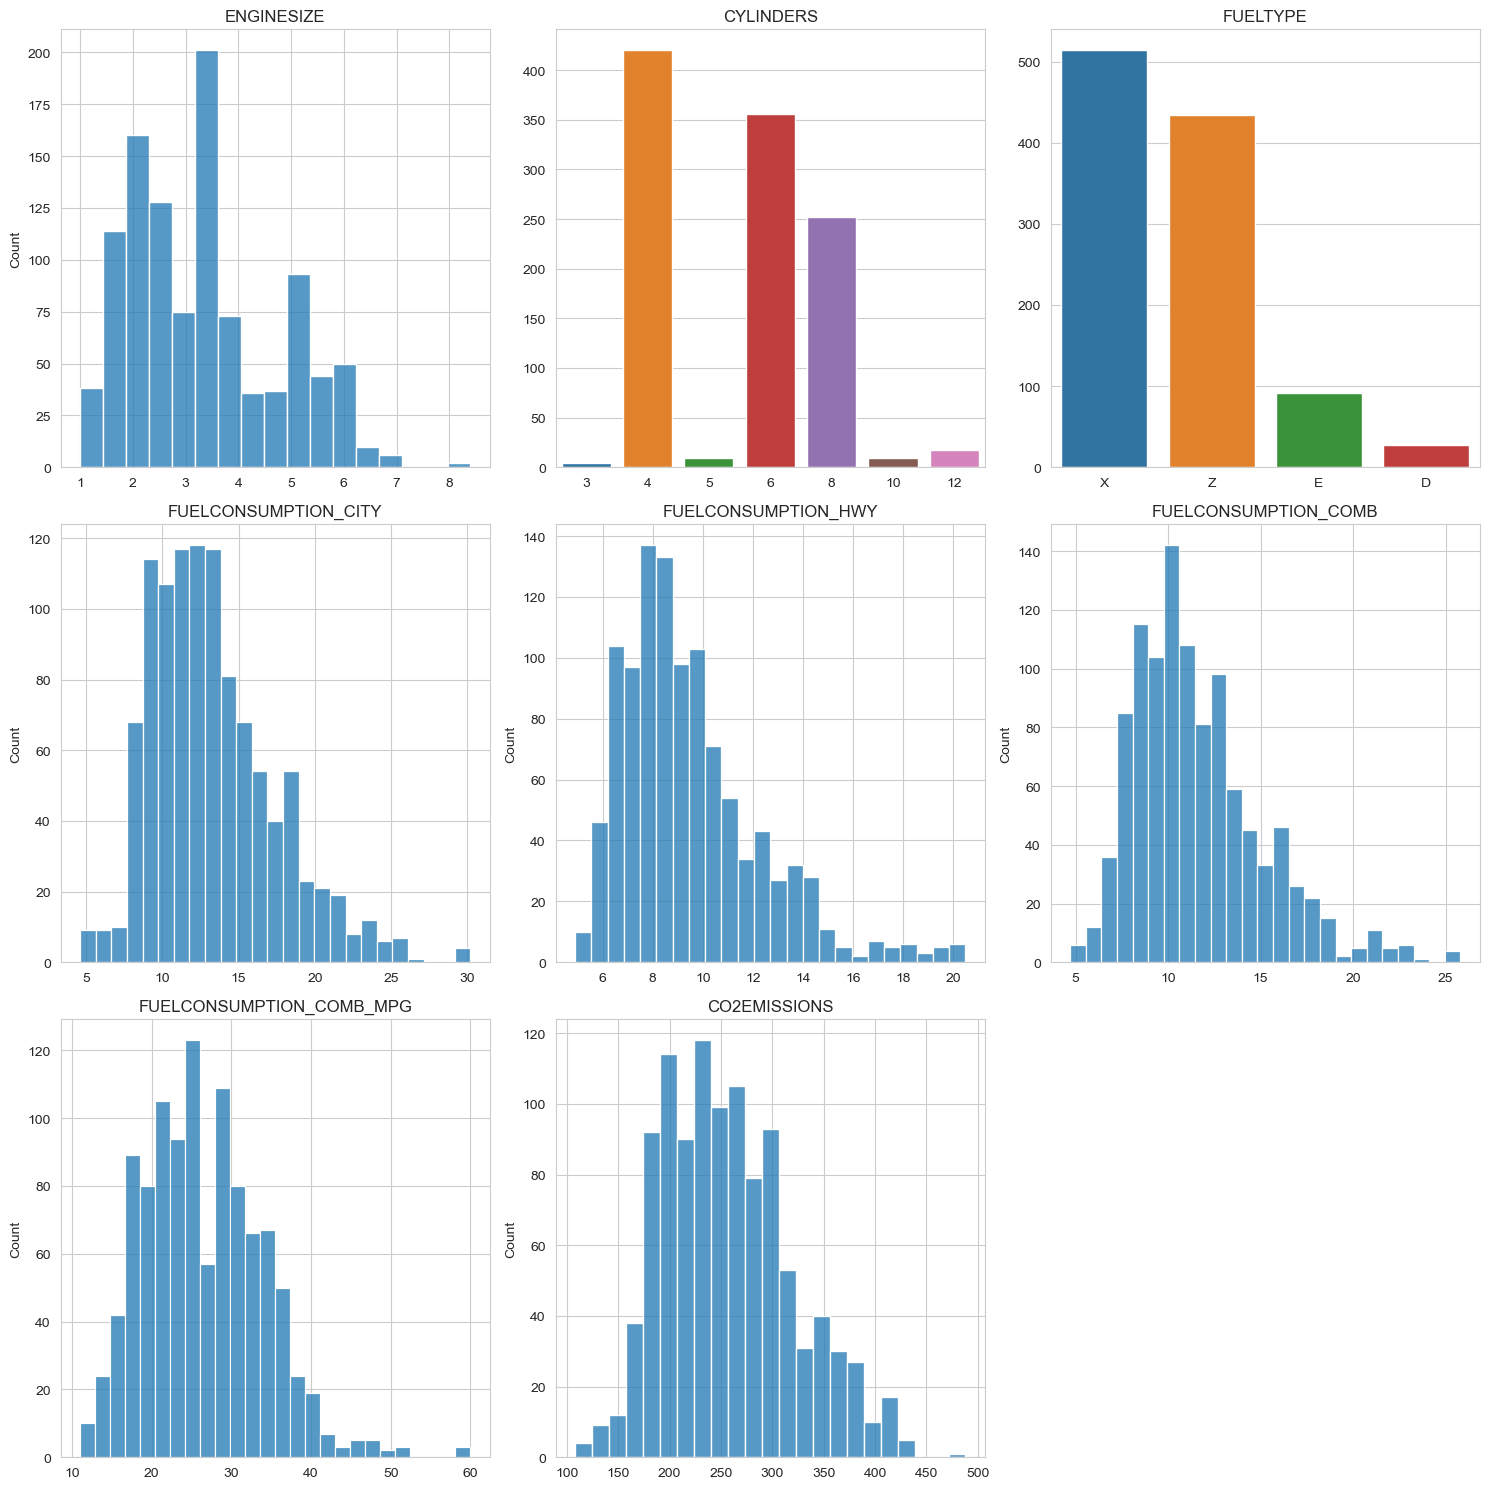

In [4]:
features = []

for feature in df.columns[1:]:
    if df[feature].dtype == 'O':
        if len(df[feature].unique()) <= 10:
            features.append(feature)
    else:
        features.append(feature)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, feature in zip(axs.flatten(), features):
    if len(df[feature].unique()) <= 10:
        value_counts = df[feature].value_counts()
        labels = value_counts.keys()
        sizes = value_counts.values
        sns.barplot(x=labels, y=sizes, hue=labels, ax=ax, palette="tab10", legend=False)
        ax.set_xlabel("")
        ax.set_title(feature)
    else:
        sns.histplot(data=df, x=feature, ax=ax)
        ax.set_xlabel("")
        ax.set_title(feature)

axs[2, 2].set_axis_off()
plt.tight_layout()
plt.show()

## Visualize the relationship between some features and the target

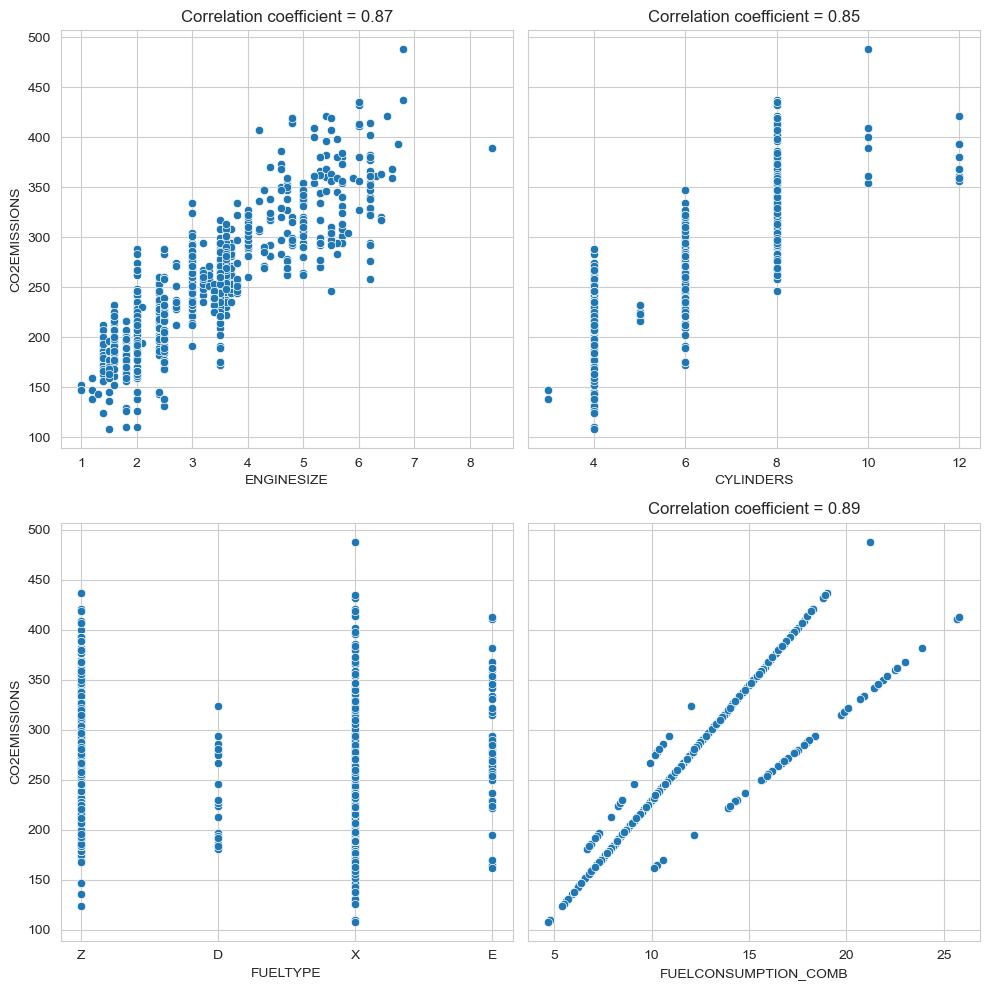

In [5]:
features = ["ENGINESIZE", "CYLINDERS", "FUELTYPE", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for feature, ax in zip(features, axs.flatten()):
    sns.scatterplot(df, x=feature, y="CO2EMISSIONS", ax=ax)
    
    if df[feature].dtype != "O":
        correlation, _ = pearsonr(df[feature], df["CO2EMISSIONS"])
        ax.set_title(f"Correlation coefficient = {correlation:.2f}")

plt.tight_layout()
plt.show()

## Preprocess the dataset

In [6]:
df_subset = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
df_subset.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Split the dataset into train and test subsets

In [7]:
X = df_subset.drop("CO2EMISSIONS", axis=1)
y = df_subset["CO2EMISSIONS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (800, 3)
X_test shape: (267, 3)


## Train a Simple Linear Regression model

Use the `FUELCONSUMPTION_COMB` feature as training data.

In [8]:
simple_regressor = linear_model.LinearRegression()
simple_regressor.fit(X_train["FUELCONSUMPTION_COMB"].to_frame(), y_train)

LinearRegression()

## Evaluate the model

The [Mean Square Error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) is a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

The [coefficient of determination (R²)](https://en.wikipedia.org/wiki/Coefficient_of_determination) provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

MSE = 792.17
R² = 0.81


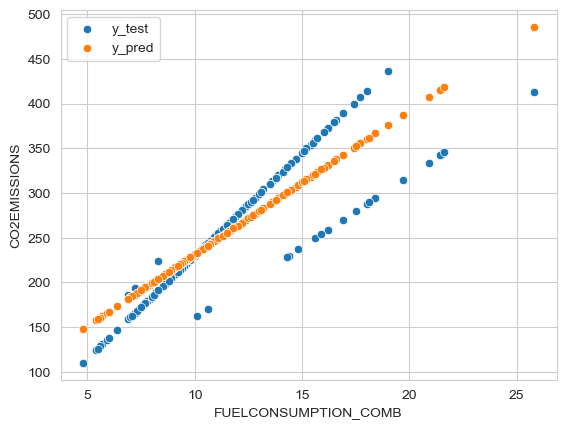

In [9]:
y_pred = simple_regressor.predict(X_test["FUELCONSUMPTION_COMB"].to_frame())

print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² = {r2_score(y_test, y_pred):.2f}")

plt.figure()
sns.scatterplot(x=X_test["FUELCONSUMPTION_COMB"], y=y_test)
sns.scatterplot(x=X_test["FUELCONSUMPTION_COMB"], y=y_pred)
plt.legend(["y_test", "y_pred"])
plt.show()


## Train a Multiple Linear Regression model

In [10]:
multiple_regressor = linear_model.LinearRegression()
multiple_regressor.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

In [11]:
y_pred = multiple_regressor.predict(X_test)

print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² = {r2_score(y_test, y_pred):.2f}")

MSE = 595.36
R² = 0.85
